<a href="https://colab.research.google.com/github/PraveenPrabhat125/Stock_market_analysis-/blob/main/power_and_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final code

In [6]:
import pandas as pd
import numpy as np

market_data = pd.read_excel('/content/Power Generation & Distribution companies (1).xlsx')


# Define weights
weights = {
    'CMP': 0.10,
    'P_E': 0.15,
    'MCAP': 0.10,
    'Div_Yld_%': 0.08,
    'NP_Qtr_Rs.Cr.': 0.12,
    'Qtr_Profit_Var_%': 0.08,
    'Sales_Qtr_Rs.Cr.': 0.10,
    'Qtr_Sales_Var_%': 0.07,
    'ROCE_%': 0.10,
    'Debt_Eq': 0.05,
    'Ind_PE': 0.05,
    'CMP/BV': 0.05
}

# Function to calculate the final score
def calculate_final_score(row, weights):
    # Extract relevant columns from the row
    indicators = row[['CMP', 'P_E', 'MCAP', 'Div_Yld_%',
                      'NP_Qtr_Rs.Cr.', 'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.',
                      'Qtr_Sales_Var_%', 'ROCE_%', 'Debt_Eq', 'Ind_PE']]

    # Remove extra spaces from column names
    indicators.index = indicators.index.str.strip()

    # Extract weights for the relevant indicators
    relevant_weights = {key: weights[key] for key in indicators.index}

    # Calculate the final score for the row
    final_score = np.sum(np.multiply(indicators, list(relevant_weights.values())))

    return final_score

# Calculate final score for each stock
market_data['Final Score'] = market_data.apply(lambda row: calculate_final_score(row, weights), axis=1)

# Display the DataFrame with the added 'Final Score' column
print(market_data[['Name', 'CMP', 'P_E', 'MCAP', 'Div_Yld_%',
                   'NP_Qtr_Rs.Cr.', 'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.',
                   'Qtr_Sales_Var_%', 'ROCE_%', 'Debt_Eq', 'Ind_PE', 'Final Score']])
market_data.columns

                Name      CMP     P_E       MCAP  Div_Yld_%  NP_Qtr_Rs.Cr.  \
0               NTPC   324.55   16.14  314705.30       2.23        5208.87   
1        Adani Green  1715.50  165.26  271740.77       0.00         256.00   
2   Power Grid Corpn   253.95   15.39  236188.83       4.36        3781.42   
3        Adani Power   570.45    9.43  220019.08       0.00        2737.96   
4   Adani Energy Sol  1098.05  105.11  122486.67       0.00         348.25   
5     Tata Power Co.   381.90   35.72  122030.02       0.52        1017.41   
6           NHPC Ltd    86.95   22.41   87341.58       2.13        1693.26   
7         JSW Energy   496.30   49.67   81625.25       0.40         232.24   
8               SJVN   129.20   48.93   50772.95       1.37         439.64   
9      Torrent Power  1003.85   22.16   48246.72       1.30         542.55   
10         NLC India   251.00   18.02   34804.58       1.39        1085.93   
11              CESC   139.10   13.09   18438.68       3.24     

Index(['Name', 'CMP', 'P_E', 'MCAP', 'Div_Yld_%', 'NP_Qtr_Rs.Cr.',
       'Qtr_Profit_Var_%', 'Sales_Qtr_Rs.Cr.', 'Qtr_Sales_Var_%', 'ROCE_%',
       'Debt_Eq', 'Ind_PE', 'Final Score'],
      dtype='object')

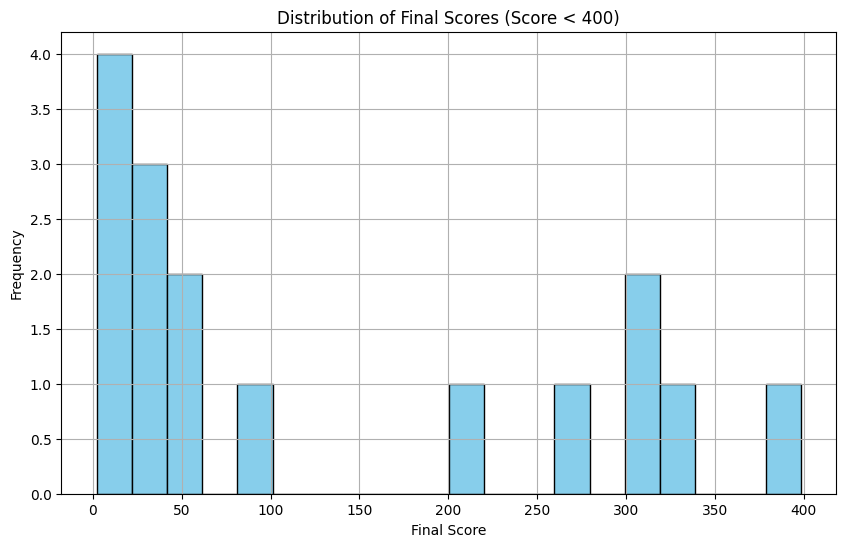

In [7]:
import matplotlib.pyplot as plt
# Filter rows where 'Final Score' is less than 400
filtered_data = market_data[market_data['Final Score'] < 400]

# Plot histogram of the filtered scores
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Final Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Scores (Score < 400)')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
# Define score ranges
score_ranges = [0, 60, 80, 100, 150, 200, 500, float('inf')]

# Create bins using pd.cut
bins = pd.cut(market_data['Final Score'], bins=score_ranges, right=False)

# Count the occurrences in each bin
score_distribution = pd.value_counts(bins, sort=False)

# Display the count for each range
print(score_distribution)


[0.0, 60.0)        9
[60.0, 80.0)       0
[80.0, 100.0)      1
[100.0, 150.0)     0
[150.0, 200.0)     0
[200.0, 500.0)     6
[500.0, inf)      16
Name: Final Score, dtype: int64


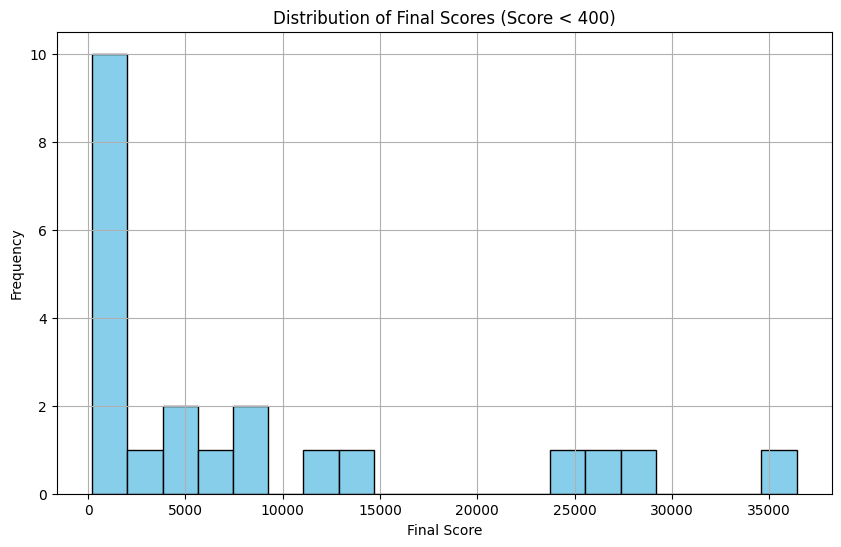

In [9]:
import matplotlib.pyplot as plt
# Filter rows where 'Final Score' is less than 400
filtered_data = market_data[market_data['Final Score'] > 100]

# Plot histogram of the filtered scores
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Final Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Scores (Score < 400)')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [17]:
# Filter rows where 'Final Score' is greater than 60
filtered_data = market_data[market_data['Final Score'] > 60]

# Sort the filtered data by 'MCAP' and 'Final Score' in descending order
final_list = filtered_data.sort_values(by=['MCAP', 'Final Score'], ascending=[False, False])

# Display the final list
print(final_list[['Name', 'CMP', 'MCAP','Div_Yld_%', 'ROCE_%',
       'Debt_Eq', 'Ind_PE', 'Final Score']])

# Assuming df is your DataFrame
selected_columns = ['Name', 'CMP', 'MCAP', 'Div_Yld_%', 'ROCE_%', 'Debt_Eq', 'Ind_PE', 'Final Score']
df_selected = final_list[selected_columns]

# df_selected.columns
df_selected.to_excel('_summaryPower Generation & Distribution.xlsx')


                Name      CMP       MCAP  Div_Yld_%  ROCE_%  Debt_Eq  Ind_PE  \
0               NTPC   324.55  314705.30       2.23    9.83     1.45   22.29   
1        Adani Green  1715.50  271740.77       0.00    7.81     7.23   22.29   
2   Power Grid Corpn   253.95  236188.83       4.36   13.09     1.38   22.29   
3        Adani Power   570.45  220019.08       0.00   15.80     0.80   22.29   
4   Adani Energy Sol  1098.05  122486.67       0.00   10.22     3.03   22.29   
5     Tata Power Co.   381.90  122030.02       0.52   11.74     1.74   22.29   
6           NHPC Ltd    86.95   87341.58       2.13    8.49     0.77   22.29   
7         JSW Energy   496.30   81625.25       0.40    7.28     1.40   22.29   
8               SJVN   129.20   50772.95       1.37    9.27     1.19   22.29   
9      Torrent Power  1003.85   48246.72       1.30   18.30     0.90   22.29   
10         NLC India   251.00   34804.58       1.39   13.47     1.32   22.29   
11              CESC   139.10   18438.68